<a href="https://colab.research.google.com/github/samiyaalizaidi/Deep-Learning-Practice/blob/main/strp_1_practice_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1**: Load and Preprocess the CIFAR-10 Dataset

### Loading the Libraries and the Frameworks

In [ ]:
# data visualization and manipulation libraries
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Pytorch
import torch
import torchvision
import torch.nn.functional as F # Contains all the activation functions
import torch.nn as nn # The Neural Network
import torch.optim as optim # The Optimizer
import torchvision.transforms as transforms # The Tranform to be used

from torch.utils.data import DataLoader # Dataloader

### Set up the device

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("device:", device)

device: cuda


### Download the **Dataset**

In [ ]:
# we first download the dataset without using any transform
training_data = torchvision.datasets.CIFAR10(root='./data/CIFAR10', train=True, download=True)

# observe the shape of the data
print(training_data.data.shape)

'''
This shows that:
50000 => Number of Images
32 => Width
32 => Height
3 => Number of Channels
'''

Files already downloaded and verified
(50000, 32, 32, 3)


' \nThis shows that:\n50000 => Number of Images\n32 => Width\n32 => Height\n3 => Number of Channels\n'

### Creating Transforms and Dataloaders

In [ ]:
# We just want to convert it to a tensor
training_transform = transforms.Compose([
    transforms.ToTensor()
])

# We use the same transform for the training and validation data
testing_transform = training_transform

# we download the data set again
# but
# this time we will be applying the transforms as well

training_data = torchvision.datasets.CIFAR10(root='./data/CIFAR10', train=True, download=True, transform=training_transform)
testing_data = torchvision.datasets.CIFAR10(root='./data/CIFAR10', train=False, download=True, transform=testing_transform)

# Making the dataloader
training_loader = DataLoader(training_data, batch_size = 128, shuffle = True, num_workers = 2)
testing_loader = DataLoader(testing_data, batch_size = 256, shuffle = False, num_workers = 2)


Files already downloaded and verified
Files already downloaded and verified


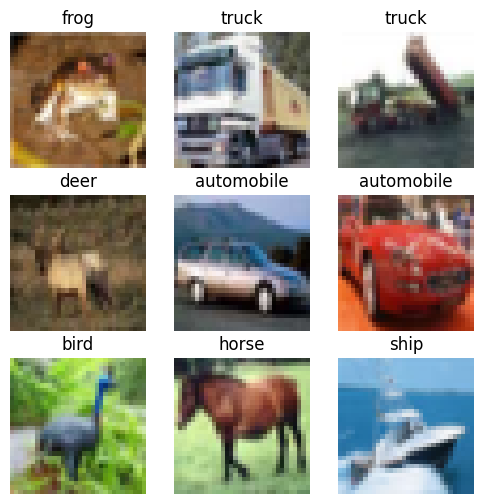

In [ ]:
# Defining the Classes present
CIFAR10_CLASSES = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# defining the number of rows and cols to be displayed
rows = 3
cols = 3

# getting the samples from the training set
image = training_data.data[:rows*cols]
label = training_data.targets[:rows*cols]

fig = plt.figure(figsize=(2 * cols, 2 * rows))

i = 0

# Add subplot for each image
for col in range(cols):
    for row in range(rows):

        ax = fig.add_subplot(rows, cols, col * rows + row + 1) # Add a sub-plot at (row, col)
        # ax.grid(b=False) # Get rid of the grids
        ax.axis("off") # Get rid of the axis
        ax.imshow(image[i, :]) # Show random image
        ax.set_title(CIFAR10_CLASSES[label[i]]) # Set title of the sub-plot

        i = i + 1
plt.show()

# **Task 2:** Creating the filt() Function


In [ ]:
# Creating the function

def filt(input, filter, padding: bool, normalization: bool):

  # getting the features
  height, width, channels = input.shape
  filter_height, filter_width, filter_channels = filter.shape

  # Extract the min and max values of the image
  min, max = np.min(input), np.max(input)

  # initializing the output image
  output = np.zeros((height, width))

  # add padding if required
  if padding:
    padding_height = height // 2
    padding_width = width // 2

    # add the padding to the image
    input = np.pad(input, ((padding_height, padding_height), (padding_width, padding_width), (0, 0))) # returns an image with padding added

  else:
    # when there's no padding the image size must decrease
    # n - k + 1
    # n = image size, k = filter size
    dimensions = (height - filter_height + 1, width - filter_width + 1)
    output = np.zeros(dimensions)

    # Update the dimensions for the loops
    height -= (filter_height - 1)
    width -= (filter_width - 1)

  # Iterate over the image
  for x in range(height):
    for y in range(width):

      val = 0

      # Calculate the region of interest
      ROI = input[x:x + filter_height, y:y + filter_width, :]

      # perform element-wise multiplication and then sum the values
      val += np.sum(ROI * filter)

      # Update the output image with the filtered value
      output[x, y] = val

  # normalize if required
  if normalization:
    output = (output - min) / (max - min)

  # return the final output
  return output

# filter with 2 channels
filter = np.array([
    [[1, 1], [1, 1]],
    [[1, 1], [1, 1]]
])

# sample input with 2 channels
sample_input = np.array([
    [[10, 20], [30, 40], [50, 60]],
    [[70, 80], [90, 100], [110, 120]],
    [[130, 140], [150, 160], [170, 180]]
])

# # Cases for testing
# print('No padding, no normalization\n', filt(sample_input, filter, 0, 0)) # No padding, no normalization
# print('No padding, Normalize\n', filt(sample_input, filter, 0, 1)) # No padding, Normalize
# print('Padding, no normalization\n', filt(sample_input, filter, 1, 0)) # Padding, no normalization
# print('Padding, Normalize\n', filt(sample_input, filter, 1, 1)) # Padding, Normalize

# Applying on the images

# filter with 3 channels
image_filter = np.array([
    [[1, 1, 1], [1, 1, 1]],
    [[1, 1, 1], [1, 1, 1]]
])

# Sharpening Filter
sharp = np.array([
    [[0, 0, 0], [-1, -1, -1], [0, 0, 0]],
    [[-1, -1, -1],  [5, 5, 5], [-1, -1, -1]],
    [[0, 0, 0], [-1, -1, -1], [0, 0, 0]],
])

# list to store the filtered images
List_of_Images = []

# Applying on every image
for img in image:
  x = filt(img, sharp, 1, 1)
  List_of_Images.append(x)

### Displaying the Images

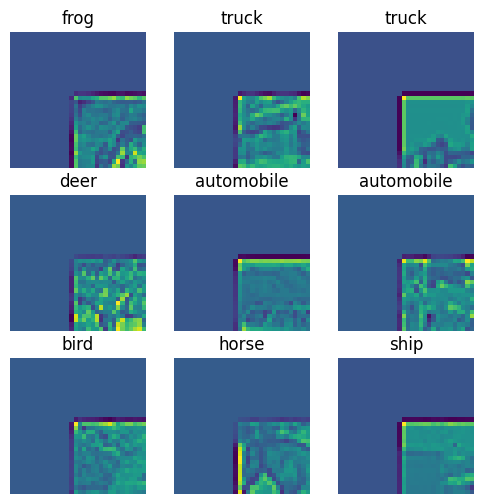

In [ ]:
fig = plt.figure(figsize=(2 * cols, 2 * rows))

i = 0

# Add subplot for each image
for col in range(cols):
    for row in range(rows):

        ax = fig.add_subplot(rows, cols, col * rows + row + 1) # Add a sub-plot at (row, col)
        # ax.grid(b=False) # Get rid of the grids
        ax.axis("off") # Get rid of the axis
        ax.imshow(List_of_Images[i]) # Show random image
        ax.set_title(CIFAR10_CLASSES[label[i]]) # Set title of the sub-plot

        i = i + 1
plt.show()

In [ ]:
# not my solution

import math

def filt(input, filter, padding, normalization):
  width, height= input.shape[0], input.shape[1]
  x_filter, y_filter = filter.shape
  pad_width = math.ceil((x_filter - 1)/2)
  pad_height = math.ceil((y_filter - 1)/2)

  output_image = np.zeros(input.shape)
  padded_image = input

  if len(input.shape) != 3: #Greyscale image
    if padding:
      padded_image = np.zeros((width + (2 * pad_width), height + (2 * pad_height)))
      padded_image = np.pad(input, (pad_width, pad_height), mode='constant')

    elif not padding:
      sub_img = np.subtract(padded_image.shape[0:2], filter.shape)
      output_image = np.zeros((sub_img[0] + 1, sub_img[1] + 1), dtype=int)

    if normalization:
      padded_image = padded_image.astype("float32")
      output_image = output_image.astype("float32")
      padded_image = (padded_image -  np.amin(padded_image))/ np.amax(padded_image)+ np.amin(padded_image)

    output_width = output_image.shape[0] - x_filter + 1
    output_height = output_image.shape[1] - y_filter + 1

    for i in range(output_width):
      for j in range(output_height):
          output_image[i, j] = np.sum(filter*padded_image[i:i+x_filter, j:j+y_filter])

  else: #RGB image
    if padding:
      padded_image = np.zeros((input.shape[0] + (2 * pad_width), input.shape[1] + (2 * pad_width), 3))
      padded_image[:, :, 0] = np.pad(input[:, :, 0], pad_width, mode='constant')
      padded_image[:, :, 1] = np.pad(input[:, :, 1], pad_width, mode='constant')
      padded_image[:, :, 2] = np.pad(input[:, :, 2], pad_width, mode='constant')
      output_image = np.zeros(padded_image.shape)

    elif not padding:
      sub_img = np.subtract(padded_image.shape[0:2], filter.shape)
      output_image = np.zeros((sub_img[0] + 1, sub_img[1] + 1), dtype=int)

    if normalization:
      padded_image = padded_image.astype("float32")
      output_image = output_image.astype("float32")

      padded_image[:, :, 0]= (padded_image[:, :, 0] - np.amin(padded_image[:, :, 0])) / (np.amax(padded_image[:, :, 0])- np.amin(padded_image[:, :, 0]))
      padded_image[:, :, 1]= (padded_image[:, :, 1] - np.amin(padded_image[:, :, 1])) / (np.amax(padded_image[:, :, 1])- np.amin(padded_image[:, :, 1]))
      padded_image[:, :, 2]= (padded_image[:, :, 2] - np.amin(padded_image[:, :, 2])) / (np.amax(padded_image[:, :, 2])- np.amin(padded_image[:, :, 2]))

    output_width = output_image.shape[0] - x_filter + 1
    output_height = output_image.shape[1] - y_filter + 1

    for i in range(3): #3 channels
      for j in range(output_width):
        for k in range(output_height):
          output_image[j,k,i] = np.sum(filter * padded_image[:, :, i][j:j+x_filter, k:k+y_filter])

  return output_image

## Task 3

### Feed Forward Neural Network

In [ ]:
# Training function

def train_for_epoch():

  # train the model
  model.train()

  # keeping track of the training losses
  training_losses = []

  for batch, targets in tqdm(training_loader):

    # moving the data to the GPU
    batch = batch.to(device)
    targets = targets.to(device)

    # set the gradient to zero
    optimizer.zero_grad()

    # forward propogration
    predictions = model(batch)

    # calculating the loss
    loss = criterion(predictions, targets)

    # backpropagate
    loss.backward()

    # updating weights
    optimizer.step()

    # update the loss in the list
    training_losses.append(loss.item())

  train_loss = np.mean(training_losses)

  return train_loss

In [ ]:
# testing function

def test():

    # put the model in the testing mode
    model.eval()

    # for tracking the losses and predictions
    test_losses = []
    test_predictions = []

    # to avoid calculating gradients
    # helps save computational resources
    with torch.no_grad():
        for batch, targets in tqdm(testing_loader):

            # Moving things to the device
            batch = batch.to(device)
            targets = targets.to(device)

            # forward propagation
            predictions = model(batch)

            # calculate the loss
            loss = criterion(predictions, targets)

            # update the losses' list
            test_losses.append(loss.item())

            # save the predictions
            test_predictions.extend(predictions.argmax(dim=1).cpu().numpy())

    # find the average test loss
    avg_test_loss = np.mean(test_losses)

    # Collect predictions into y_pred and ground truth into y_true
    y_pred = np.array(test_predictions, dtype=np.float32)
    y_true = np.array(testing_data.targets, dtype=np.float32)

    # Calculate accuracy as the average number of times y_true == y_pred
    accuracy = np.mean([y_pred[i] == y_true[i] for i in range(len(y_true))])

    return avg_test_loss, accuracy

In [ ]:
# final training

def train(first_epoch, num_epochs):

    train_losses = []
    test_losses = []
    epoch_num = []

    for epoch in range(first_epoch, first_epoch + num_epochs):
        # tracking the epoch
        epoch_num.append(epoch)

        # training for each epoch
        train_loss = train_for_epoch()
        train_losses.append(train_loss)

        # test the model
        test_loss, test_accuracy = test()

        test_losses.append(test_loss)

        print(f'[{epoch:03d}] train loss: {train_loss:04f}',
                f'test loss: {test_loss:04f}',
                f'test accuracy: {test_accuracy:04f}')

        print('')

    return epoch_num, train_losses, test_losses

In [ ]:
# Define Model

class MLP(nn.Module):

    def __init__(self, input_size=32*32*3, output_size=10):
        super().__init__()

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, output_size)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))

        return x

In [ ]:
# Creating an instance of the model
model = MLP()

# Shift the model to the GPU
model.to(device)

MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3072, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=64, bias=True)
  (fc6): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
# Initialize the optimizer and losses
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)  #optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Train for 75 epochs
epochs, train_losses, test_losses = train(1, 25)# final training

def train(first_epoch, num_epochs):

    train_losses = []
    test_losses = []
    epoch_num = []

    for epoch in range(first_epoch, first_epoch + num_epochs):
        # tracking the epoch
        epoch_num.append(epoch)

        # training for each epoch
        train_loss = train_for_epoch()
        train_losses.append(train_loss)

        # test the model
        test_loss, test_accuracy = test()

        test_losses.append(test_loss)

        print(f'[{epoch:03d}] train loss: {train_loss:04f}',
                f'test loss: {test_loss:04f}',
                f'test accuracy: {test_accuracy:04f}')

        print('')

    return epoch_num, train_losses, test_losses

100%|██████████| 40/40 [00:02<00:00, 19.54it/s]


[001] train loss: 2.302599 test loss: 2.301775 test accuracy: 0.108500



100%|██████████| 40/40 [00:02<00:00, 16.19it/s]


[002] train loss: 2.301362 test loss: 2.300522 test accuracy: 0.150700



100%|██████████| 40/40 [00:02<00:00, 14.06it/s]


[003] train loss: 2.299892 test loss: 2.298662 test accuracy: 0.159300



100%|██████████| 40/40 [00:02<00:00, 16.28it/s]


[004] train loss: 2.297429 test loss: 2.295311 test accuracy: 0.156500



100%|██████████| 40/40 [00:02<00:00, 19.34it/s]


[005] train loss: 2.292689 test loss: 2.288562 test accuracy: 0.184800



100%|██████████| 40/40 [00:01<00:00, 21.53it/s]


[006] train loss: 2.282191 test loss: 2.272070 test accuracy: 0.168200



100%|██████████| 40/40 [00:02<00:00, 17.07it/s]


[007] train loss: 2.252881 test loss: 2.222130 test accuracy: 0.204000



100%|██████████| 40/40 [00:01<00:00, 22.08it/s]


[008] train loss: 2.185622 test loss: 2.151045 test accuracy: 0.204300



100%|██████████| 40/40 [00:01<00:00, 21.98it/s]


[009] train loss: 2.140612 test loss: 2.129058 test accuracy: 0.201300



100%|██████████| 40/40 [00:01<00:00, 21.98it/s]


[010] train loss: 2.123957 test loss: 2.113670 test accuracy: 0.223400



100%|██████████| 40/40 [00:01<00:00, 21.60it/s]


[011] train loss: 2.107265 test loss: 2.091186 test accuracy: 0.250000



100%|██████████| 40/40 [00:01<00:00, 21.63it/s]


[012] train loss: 2.076300 test loss: 2.044224 test accuracy: 0.262300



100%|██████████| 40/40 [00:01<00:00, 21.91it/s]


[013] train loss: 2.004649 test loss: 1.952231 test accuracy: 0.269700



100%|██████████| 40/40 [00:01<00:00, 21.81it/s]


[014] train loss: 1.931789 test loss: 1.912075 test accuracy: 0.284600



100%|██████████| 40/40 [00:01<00:00, 21.88it/s]


[015] train loss: 1.897300 test loss: 1.876292 test accuracy: 0.295100



100%|██████████| 40/40 [00:01<00:00, 21.92it/s]


[016] train loss: 1.874805 test loss: 1.852463 test accuracy: 0.314400



100%|██████████| 40/40 [00:01<00:00, 22.01it/s]


[017] train loss: 1.850342 test loss: 1.867971 test accuracy: 0.308000



100%|██████████| 40/40 [00:01<00:00, 20.54it/s]


[018] train loss: 1.824764 test loss: 1.809292 test accuracy: 0.328500



100%|██████████| 40/40 [00:02<00:00, 16.64it/s]


[019] train loss: 1.802707 test loss: 1.800057 test accuracy: 0.336900



100%|██████████| 40/40 [00:02<00:00, 13.90it/s]


[020] train loss: 1.781494 test loss: 1.763208 test accuracy: 0.348000



100%|██████████| 40/40 [00:02<00:00, 16.30it/s]


[021] train loss: 1.763359 test loss: 1.787135 test accuracy: 0.341400



100%|██████████| 40/40 [00:01<00:00, 20.62it/s]


[022] train loss: 1.740697 test loss: 1.725394 test accuracy: 0.365300



100%|██████████| 40/40 [00:01<00:00, 21.74it/s]


[023] train loss: 1.714662 test loss: 1.694082 test accuracy: 0.375600



100%|██████████| 40/40 [00:01<00:00, 21.70it/s]


[024] train loss: 1.687763 test loss: 1.698360 test accuracy: 0.379600



100%|██████████| 40/40 [00:01<00:00, 21.90it/s]

[025] train loss: 1.659043 test loss: 1.640460 test accuracy: 0.397500



### Creating a CNN

In [ ]:
# Creating the CNN

class CNN(nn.Module):

    def __init__(self, input_channels = 3, output_size = 10):
        # initialize the ctor
        super().__init__()

        self.conv1 = nn.Conv2d(input_channels, 32, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size = 3,  stride = 1, padding = 1)
        self.maxPool = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256*4*4, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, output_size)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)

        x = self.maxPool(x)

        x = self.conv3(x)
        x = F.relu(x)

        x = self.maxPool(x)

        x = self.conv4(x)
        x = F.relu(x)

        x = self.maxPool(x)

        x = self.flatten(x)

        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)

        return x

In [ ]:
# Create an instance of the model CNN
model = CNN()

# Shift the model to the GPU
model.to(device)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxPool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=4096, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
# set the optimizer and the loss functions
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
newEpochs, newTrainingLosses, newTestingLosses = train(1, 15)

100%|██████████| 40/40 [00:01<00:00, 20.87it/s]


[001] train loss: 1.598367 test loss: 1.260980 test accuracy: 0.542400



100%|██████████| 40/40 [00:01<00:00, 20.67it/s]


[002] train loss: 1.015012 test loss: 0.895276 test accuracy: 0.689700



100%|██████████| 40/40 [00:01<00:00, 20.24it/s]


[003] train loss: 0.755975 test loss: 0.760395 test accuracy: 0.736100



100%|██████████| 40/40 [00:02<00:00, 16.97it/s]


[004] train loss: 0.601939 test loss: 0.720533 test accuracy: 0.750800



100%|██████████| 40/40 [00:02<00:00, 14.31it/s]


[005] train loss: 0.475745 test loss: 0.719925 test accuracy: 0.766900



100%|██████████| 40/40 [00:02<00:00, 14.27it/s]


[006] train loss: 0.360905 test loss: 0.758898 test accuracy: 0.762400



100%|██████████| 40/40 [00:02<00:00, 16.94it/s]


[007] train loss: 0.258486 test loss: 0.740904 test accuracy: 0.782100



100%|██████████| 40/40 [00:01<00:00, 20.93it/s]


[008] train loss: 0.179974 test loss: 0.879468 test accuracy: 0.769800



100%|██████████| 40/40 [00:01<00:00, 21.12it/s]


[009] train loss: 0.131993 test loss: 0.959735 test accuracy: 0.776400



100%|██████████| 40/40 [00:01<00:00, 20.15it/s]


[010] train loss: 0.111987 test loss: 1.008312 test accuracy: 0.763300



100%|██████████| 40/40 [00:01<00:00, 20.68it/s]


[011] train loss: 0.086865 test loss: 1.163710 test accuracy: 0.777800



100%|██████████| 40/40 [00:01<00:00, 21.08it/s]


[012] train loss: 0.073553 test loss: 1.134976 test accuracy: 0.776000



100%|██████████| 40/40 [00:01<00:00, 20.75it/s]


[013] train loss: 0.074836 test loss: 1.202538 test accuracy: 0.779900



100%|██████████| 40/40 [00:01<00:00, 21.06it/s]


[014] train loss: 0.062640 test loss: 1.287495 test accuracy: 0.777000



100%|██████████| 40/40 [00:01<00:00, 20.96it/s]

[015] train loss: 0.063147 test loss: 1.430806 test accuracy: 0.759100

